In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values


In [3]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [6]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [20]:
# Initialising the RNN
regressor = Sequential()

In [21]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [22]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


In [23]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

In [24]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))


In [25]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [26]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [27]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.20)


Train on 958 samples, validate on 240 samples
Epoch 1/100
958/958 [==============================] - 3s 3ms/step - loss: 0.0261 - val_loss: 0.0023
Epoch 2/100
958/958 [==============================] - 2s 2ms/step - loss: 0.0068 - val_loss: 0.0054
Epoch 3/100
958/958 [==============================] - 2s 2ms/step - loss: 0.0058 - val_loss: 0.0021
Epoch 4/100
958/958 [==============================] - 2s 2ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 5/100
958/958 [==============================] - 2s 2ms/step - loss: 0.0058 - val_loss: 0.0023
Epoch 6/100
958/958 [==============================] - 2s 2ms/step - loss: 0.0046 - val_loss: 0.0042
Epoch 7/100
958/958 [==============================] - 2s 2ms/step - loss: 0.0044 - val_loss: 0.0021
Epoch 8/100
958/958 [==============================] - 2s 2ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 9/100
958/958 [==============================] - 2s 2ms/step - loss: 0.0056 - val_loss: 0.0031
Epoch 10/100
958/958 [=======================

Epoch 81/100
958/958 [==============================] - 2s 2ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 82/100
958/958 [==============================] - 2s 2ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 83/100
958/958 [==============================] - 2s 2ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 84/100
958/958 [==============================] - 2s 2ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 85/100
958/958 [==============================] - 2s 2ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 86/100
958/958 [==============================] - 2s 2ms/step - loss: 0.0014 - val_loss: 9.3779e-04
Epoch 87/100
958/958 [==============================] - 2s 2ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 88/100
958/958 [==============================] - 2s 2ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 89/100
958/958 [==============================] - 2s 2ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 90/100
958/958 [==============================] - 2s 2ms/step - loss: 0.

In [28]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [29]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

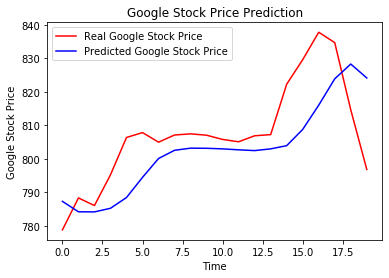

In [19]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()